In [103]:
import pandas as pd
import matplotlib as plt
import scipy

In [3]:
df = pd.read_csv('Main Table CC.csv')

In [96]:
df['temperature'] = df['temperature'].apply(lambda x: (x - 273.15) * 9/5 + 32)

In [97]:
temp_gb = df.groupby('temperature')
temp_gb['Crime Category'].count()
temp_df = pd.DataFrame({
    'Crimes' : temp_gb['Crime Category'].count(),
    'Temperature (F)' : temp_gb['Crime Category'].count().index,
})

temp_df.head()

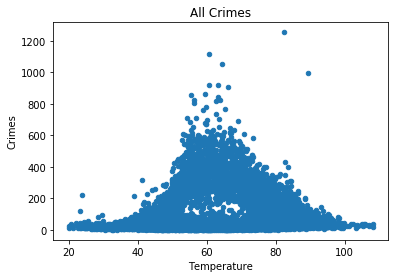

In [105]:
temp_df.plot(kind='scatter', x='Temperature', y='Crimes', title='All Crimes')
plt.pyplot.savefig('All Crimes.png')

In [26]:
temp_df.loc[temp_df['Crimes'] >= 800]

,Crimes,Temperature
temperature,,
286.150,856,286.150
286.640,807,286.640
286.650,825,286.650
288.400,863,288.400
289.080,921,289.080
289.150,1113,289.150
290.150,819,290.150
290.480,922,290.480
290.550,845,290.550


In [99]:
categories = df['Crime Category'].dropna().unique()

temperatures_dict = {}
for cat in categories:
    if cat != 'nan':
        crimes_gb = df.loc[df['Crime Category'] == cat].groupby('temperature')
        temperatures_dict[cat] = pd.DataFrame({
        cat : crimes_gb['Crime Category'].count(),
        'Temperature' : crimes_gb['Crime Category'].count().index,
})


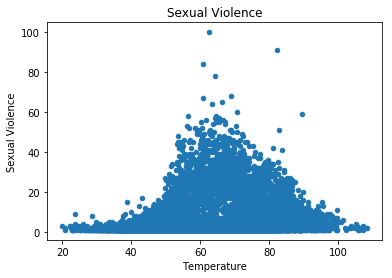

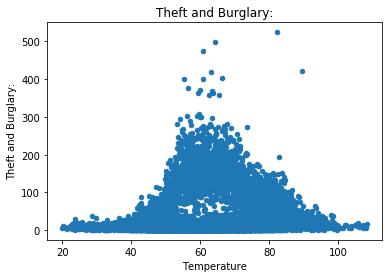

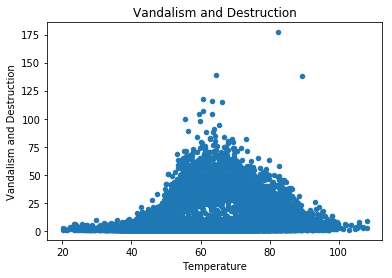

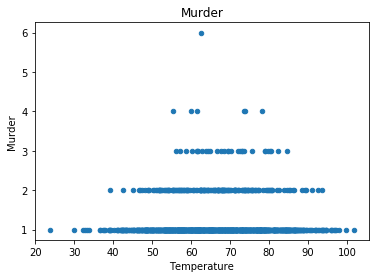

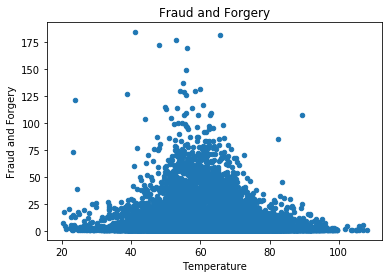

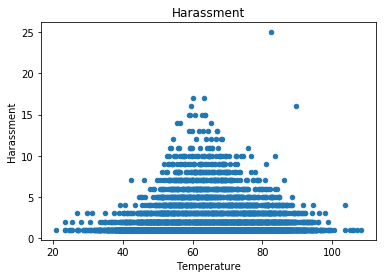

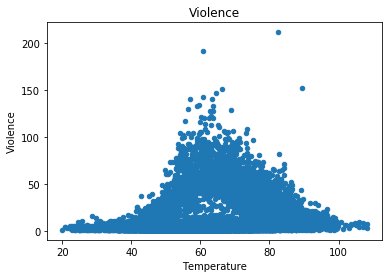

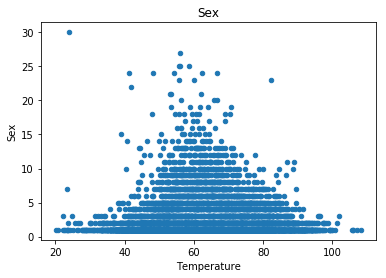

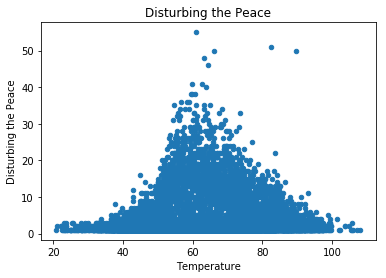

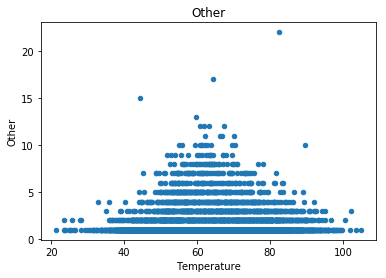

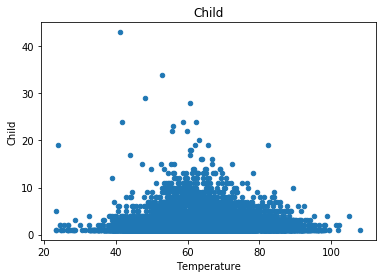

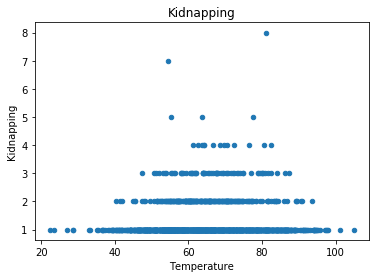

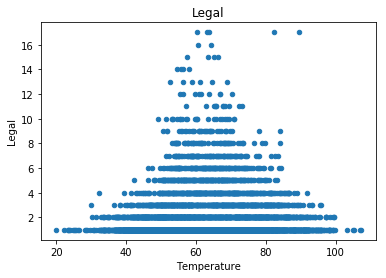

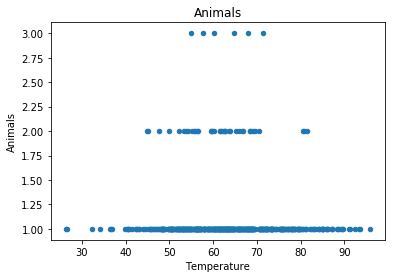

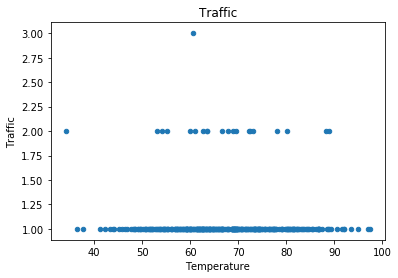

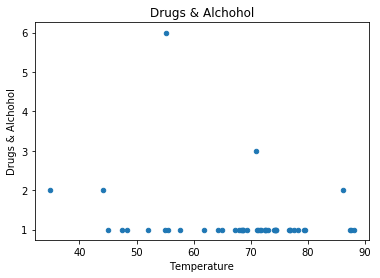

In [104]:
fig_dict={}
for plot in temperatures_dict.keys():
    if temperatures_dict[plot].columns[0]:
        temperatures_dict[plot].plot(kind='scatter', x='Temperature', y=plot, title=plot)
        plt.pyplot.savefig(f'{plot}_graph.png')

In [89]:
temperatures_dict.keys()


dict_keys(['Sexual Violence', 'Theft and Burglary:', 'Vandalism and Destruction', 'Murder', 'Fraud and Forgery', 'Harassment', 'Violence', nan, 'Sex', 'Disturbing the Peace', 'Other', 'Child', 'Kidnapping', 'Legal', 'Animals', 'Traffic', 'Drugs & Alchohol'])

In [72]:
temperatures_dict.keys()

dict_keys(['Sexual Violence'])